Import libraries

In [274]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

Connect to database

In [275]:
db_path = "database.sqlite"
connection = sqlite3.connect(db_path)

All available tables

In [277]:
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql_query(tables_query, connection)

DatabaseError: Execution failed on sql 'SELECT name FROM sqlite_master WHERE type='table';': file is not a database

Function to read table data to DataFrame

In [ ]:
def read_table(table_name):
    query = "SELECT * FROM " + table_name
    return pd.read_sql_query(query, connection)

Read tables to DataFrame

In [ ]:
df_player_attributes = read_table("Player_Attributes")
df_player = read_table("Player")
df_match = read_table("Match")
df_league = read_table("League")
df_country = read_table("Country")
df_team = read_table("Team")
df_team_attributes = read_table("Team_Attributes")

Read 'Team' table

In [261]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


Players sorted by weight

In [262]:
df_player['weight'].value_counts()

weight
165    811
176    697
154    660
172    656
168    600
159    595
163    577
161    565
170    551
174    488
181    441
183    404
157    397
179    375
185    343
150    341
187    310
152    256
148    231
143    216
190    202
146    177
194    160
192    148
198    132
141    129
196    107
139     73
203     60
137     59
201     53
132     49
134     37
205     35
209     28
207     26
212     18
128     10
130     10
214      7
126      5
216      5
220      4
218      3
123      2
243      2
121      2
225      1
227      1
117      1
Name: count, dtype: int64

Read 'League' table

In [263]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


Sort leagues by name

In [264]:
df_league.sort_values(by='name')

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


Read 'Match' table

In [265]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


Read 'Country' table

In [266]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


Read 'Team' table

In [267]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


Table with all match results

In [268]:
all_tables_query = "SELECT Match.id, League.name as league_name, Country.name as country_name, season, stage, date, HT.team_long_name AS home_team, AT.team_long_name as away_team, home_team_goal, away_team_goal FROM Match JOIN League ON League.id = Match.league_id JOIN Country ON Country.id = Match.country_id LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id"
df_matches = pd.read_sql_query(all_tables_query, connection)
df_matches.head()

DatabaseError: Execution failed on sql 'SELECT Match.id, League.name as league_name, Country.name as country_name, season, stage, date, HT.team_long_name AS home_team, AT.team_long_name as away_team, home_team_goal, away_team_goal FROM Match JOIN League ON League.id = Match.league_id JOIN Country ON Country.id = Match.country_id LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id': file is not a database

Select matches with most goals

In [269]:
df_matches['total_goals'] = df_matches['home_team_goal'] + df_matches['away_team_goal']
df_matches_most_goals = df_matches.sort_values(by='total_goals', ascending=False)
df_matches_most_goals.head()

,id,league_name,country_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,total_goals
20106,20107,Scotland Premier League,Scotland,2009/2010,37,2010-05-05 00:00:00,Motherwell,Hibernian,6,6,12
24247,24248,Spain LIGA BBVA,Spain,2015/2016,16,2015-12-20 00:00:00,Real Madrid CF,Rayo Vallecano,10,2,12
9210,9211,Germany 1. Bundesliga,Germany,2012/2013,27,2013-03-30 00:00:00,FC Bayern Munich,Hamburger SV,9,2,11
3092,3093,England Premier League,England,2011/2012,3,2011-08-28 00:00:00,Manchester United,Arsenal,8,2,10
3368,3369,England Premier League,England,2012/2013,20,2012-12-29 00:00:00,Arsenal,Newcastle United,7,3,10


Select matches with most common total goals

In [270]:
matches_total_goals = df_matches['total_goals'].value_counts()
matches_total_goals

total_goals
2     6351
3     5500
1     4506
4     4015
5     2068
0     1978
6     1009
7      360
8      142
9       36
10      11
12       2
11       1
Name: count, dtype: int64

Chart: Most common total goals in match

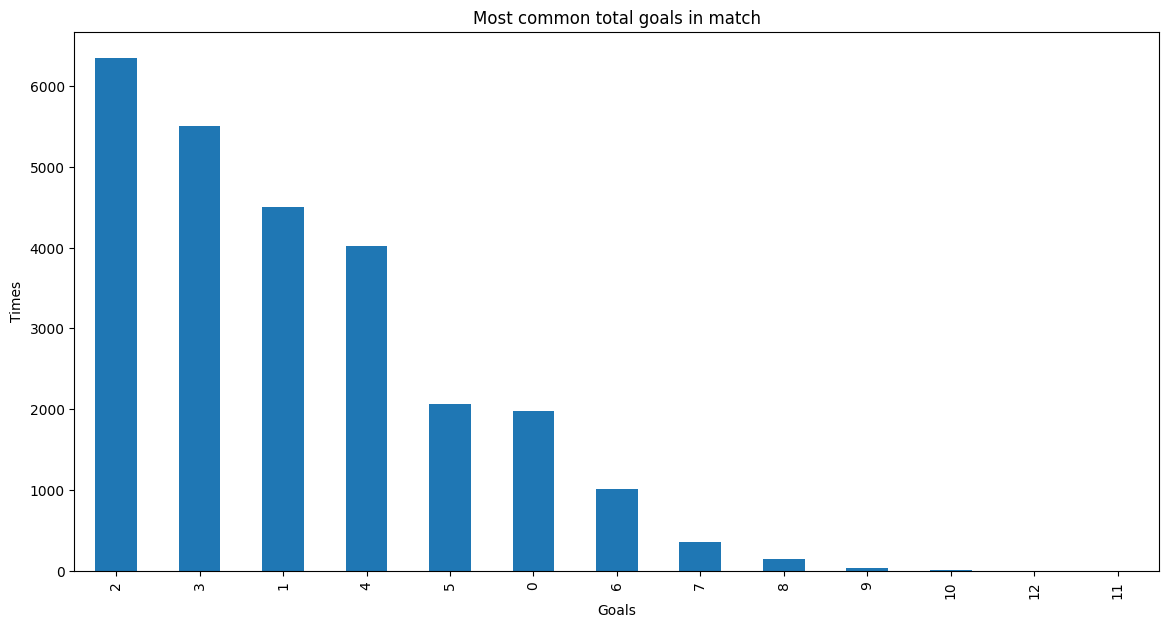

In [271]:
matches_total_goals.sort_values(ascending = False).plot(kind = 'bar', figsize = (14, 7), title = 'Most common total goals in match')
mpl.ylabel('Times')
mpl.xlabel('Goals')
mpl.show()

Select teams with league and country

In [272]:
all_teams_query = "SELECT team.team_long_name AS team_name, league.name AS league_name, country.name AS country_name FROM league JOIN match ON league.id = match.league_id JOIN team ON match.home_team_api_id = team.team_api_id JOIN country on match.country_id = country.Id GROUP BY league.name, team.team_long_name"
df_teams = pd.read_sql_query(all_teams_query, connection)
df_teams.head()

DatabaseError: Execution failed on sql 'SELECT team.team_long_name AS team_name, league.name AS league_name, country.name AS country_name FROM league JOIN match ON league.id = match.league_id JOIN team ON match.home_team_api_id = team.team_api_id JOIN country on match.country_id = country.Id GROUP BY league.name, team.team_long_name': file is not a database

Select leagues with most total clubs

In [ ]:
league_teams = df_teams['league_name'].value_counts()
league_teams

Chart: Leagues with most different teams

In [ ]:
league_teams.sort_values(ascending = False).plot(kind = 'barh', figsize = (14, 7), title = 'Leagues with most different teams')
mpl.ylabel('League')
mpl.xlabel('Teams')
mpl.gca().invert_yaxis()
mpl.show()

Select data about all seasons from top 5 leagues

In [ ]:
all_seasons_query = "SELECT country.name AS country_name, league.name AS league_name, season, count(distinct stage) AS number_of_stages, count(distinct HT.team_long_name) AS number_of_teams, avg(home_team_goal) AS avg_home_team_scores, avg(away_team_goal) AS avg_away_team_goals, avg(home_team_goal-away_team_goal) AS avg_goal_dif, avg(home_team_goal+away_team_goal) AS avg_goals, sum(home_team_goal-away_team_goal) AS total_goals FROM Match JOIN Country on Country.id = Match.country_id JOIN League on League.id = Match.league_id LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id WHERE country_name in ('Spain','Germany','France','Italy','England') GROUP BY Country.name, League.name, season HAVING count(distinct stage) > 10 ORDER BY Country.name, League.name, season DESC;"
all_seasons = pd.read_sql_query(all_seasons_query, connection)
all_seasons

In [ ]:
df = pd.DataFrame(index = np.sort(all_seasons['season'].unique()), columns = all_seasons['country_name'].unique())
df.loc[:,'Germany'] = list(all_seasons.loc[all_seasons['country_name'] == 'Germany', 'avg_goals'])
df.loc[:,'Spain'] = list(all_seasons.loc[all_seasons['country_name'] == 'Spain', 'avg_goals'])
df.loc[:,'France'] = list(all_seasons.loc[all_seasons['country_name'] == 'France', 'avg_goals'])
df.loc[:,'Italy'] = list(all_seasons.loc[all_seasons['country_name'] == 'Italy', 'avg_goals'])
df.loc[:,'England'] = list(all_seasons.loc[all_seasons['country_name'] == 'England', 'avg_goals'])
df.plot(figsize = (14,7), title = 'Average Goals per Game')
mpl.ylabel('Goals')
mpl.xlabel('Season')
mpl.show()

Select best players based on overall rating

In [ ]:
best_players_query = "SELECT player.player_api_id AS id, player_name, AVG(player_attributes.overall_rating) AS overall_rating, strftime('%d-%m-%Y', player.birthday) AS birthday, height, weight FROM Player LEFT JOIN player_attributes on player_attributes.player_api_id = player.player_api_id WHERE player_attributes.date BETWEEN '2015-01-01' AND '2015-12-31' GROUP BY Player.player_api_id ORDER BY overall_rating DESC"
best_players = pd.read_sql_query(best_players_query, connection)
best_players.head()

Chart: Top 10 players based on overall rating in 2015

In [ ]:
mpl.figure(figsize=(14, 7))
top_players = best_players.head(10)
mpl.barh(top_players['player_name'], top_players['overall_rating'])
mpl.title('Top 10 Players by Overall Rating in 2015')
mpl.xlabel('Overall Rating')
mpl.ylabel('Player Name')
mpl.gca().invert_yaxis()
mpl.show()

Select best players based on potential rating

In [273]:
best_potential_players_query = "SELECT player.player_api_id AS id, player_name, AVG(player_attributes.potential) AS potential_rating, AVG(player_attributes.overall_rating) AS overall_rating, strftime('%d-%m-%Y', player.birthday) AS birthday, height, weight FROM player LEFT JOIN player_attributes on player_attributes.player_api_id = player.player_api_id AND(player_attributes.date BETWEEN '2015-01-01' AND '2015-12-31') GROUP BY player.player_api_id ORDER BY potential_rating DESC"
best_potential_players = pd.read_sql_query(best_potential_players_query, connection)
best_potential_players.head()

DatabaseError: Execution failed on sql 'SELECT player.player_api_id AS id, player_name, AVG(player_attributes.potential) AS potential_rating, AVG(player_attributes.overall_rating) AS overall_rating, strftime('%d-%m-%Y', player.birthday) AS birthday, height, weight FROM player LEFT JOIN player_attributes on player_attributes.player_api_id = player.player_api_id AND(player_attributes.date BETWEEN '2015-01-01' AND '2015-12-31') GROUP BY player.player_api_id ORDER BY potential_rating DESC': file is not a database

Chart: Top 10 players based on potential rating in 2015

In [ ]:
mpl.figure(figsize=(14, 7))
top_potential_players = best_potential_players.head(10)
mpl.barh(top_potential_players['player_name'], top_potential_players['potential_rating'])
mpl.title('Top 10 Players by Potential Rating in 2015')
mpl.xlabel('Potential Rating')
mpl.ylabel('Player Name')
mpl.gca().invert_yaxis()
mpl.show()

Close DB connection

In [ ]:
connection.close()